# Collaboration

### Siyi Fan

## Part1 Kaggle open call projects

### 1. Kaggle Account

My account is Siyi. 

### 2. Kaggle Competition 

The one that is of interest to me is Titanic: Machine Learning from Disaster. In this challenge, the participants are asked to complete the analysis of what sorts of people were likely to survive by applying the tools of machine learning. The goal of this competition is to predict if a passenger survived the sinking of the Titanic or not. 

In order to make a submission, I will go to the Data page and download the raw data. After data cleaning, I probably will conduct some starter/exploratory analysis, such as the distrubition of certain customer attributes (e.g., age, long term deposit etc) across time and some simple but obvious bi-variate correlation between the product choice and certain customer features. Then I probably will consider develop and (re)train a machine learning model majorly based on logistic regression before submitting the predicted test dataset (in .csv) on the submission page.

In the test set, the participants must predict a 0 or 1 value for the Survived variable. The score is the percentage of passengers we correctly predict. In order to make a submission, we should submit a csv file with exactly 418 entries plus a header row. Also, the files have two columns. One is Passengerld which is sorted in any order; the other one is Survived which contains binary prediction – 1 for survived and 0 for deceased. 

### 3. Kaggle Dataset

I will explore the dataset on Mental Health in the Tech Workplace, which comes from the survey on Mental Health in the Tech Workplace in 2014. It aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers. 

I will mainly focus on three questions: Do a lot of companies provide help to people with mental health conditions? Are workers likely to reach out for help if they suffer from mental illnesses? Are workers willing to talk about mental illnessess with their employers? But first, I will preview the survey data and acquire demographic information. 

#### Previewing the survey data

There are 63 questions and 1260 survey participants. All questions could be classified into 26 categorizations. 

In [23]:
import pandas as pd
df = pd.read_csv("survey.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

#### Age Distribution

This part addresses on the question: what is your age?
The raw data shows that the typical age of the employees is in the 30s. 

Text(0,0.5,'Freq')

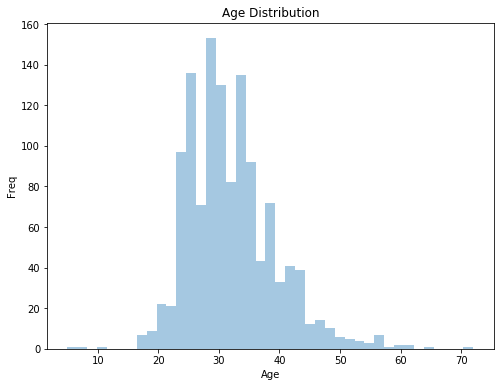

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False)
plt.title('Age Distribution')
plt.ylabel('Freq')

#### Tech Company

This part addresses on the question: Is your employer primarily a tech company/organization?
The raw data shows that "Yes" - 1031(81.8%); "No" - 229(18.2%). Therefore, the majority of the participants work in the tech field. 

Text(0,0.5,'Count')

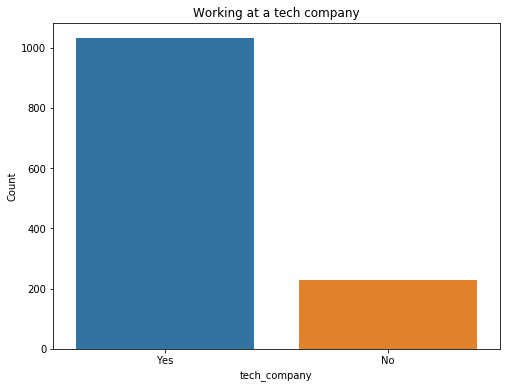

In [4]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['tech_company'].dropna(),ax=ax)
plt.title('Working at a tech company')
plt.ylabel('Count')

#### Mental health benefits

This part addresses on the question: Does your employer provide mental health benefits? The raw data shows that "Yes" - 477 (37.9%); "No" - 375(29.8%); "Don't know" - 408(32.4%).
Therefore, the majority of employers are willling to provide mental health benefits. 

Text(0,0.5,'Count')

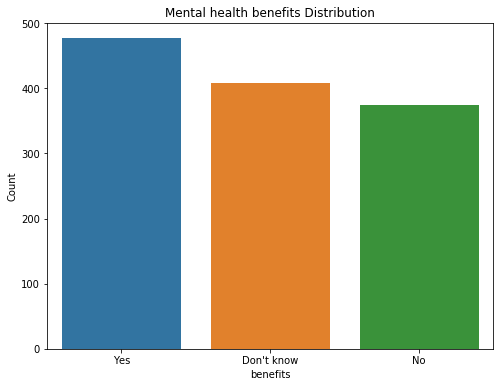

In [5]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['benefits'].dropna(),ax=ax)
plt.title('Mental health benefits Distribution')
plt.ylabel('Count')

#### Seek help

This part addresses on the question: Does your employer provide resources to learn more about mental health issues and how to seek help?
The raw data shows that "Yes" - 250(19.8%), "No" - 647(51.3%), "Don't know" - 363(28.8%). 
Therefore, even if the mental health beneifts are provided by majority empolyers, resources related to mental health are ignored by most employers. 

Text(0,0.5,'Count')

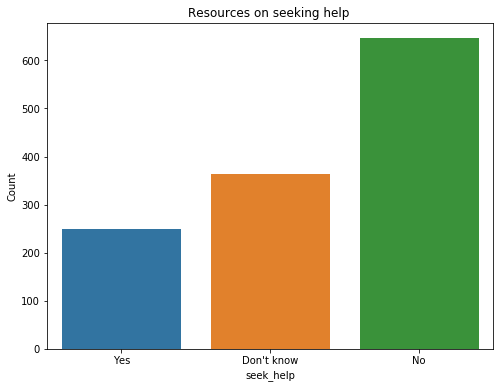

In [6]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['seek_help'].dropna(),ax=ax)
plt.title('Resources on seeking help ')
plt.ylabel('Count')

#### Treatment Distribution

This part addresses on the question: Have you sought treatment for a mental health condition? The raw data shows that 637(50.6%) sought treatment and 623(49.4%) didn't. Therefore, there is little difference between two responses.

Text(0.5,1,'Treatement Distribution')

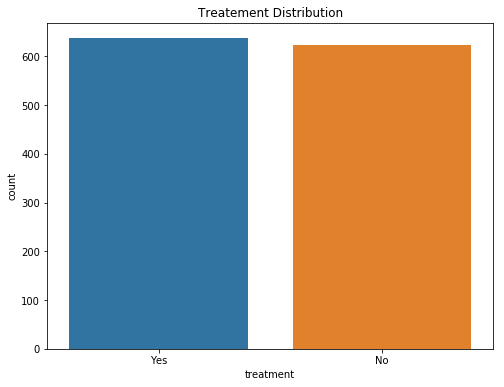

In [41]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')

#### Openness about mental illness 

This part addresses the comparison of two questions: Do you think that discussing a mental health issue with your employer would have negative consequences? And, Do you think that discussing a physical health issue with your employer would have negative consequences?
The large majority of people think discussing physical health issues with their employers will not result in negative consequences, while the answers to whether or not discussing mental health disorders with employers will result in negative consequences is more divided. In other words, some people believe there are negative consequences, however, there are still more people believe it won't. The reasons behind that could be a strong employer-employee relationship and the trust build on it. 
Based on the raw data, we can see people are more worried about the negative consequences brought by mental health issues than by physical health issues, even if there are more responses against having negative consequences in both situations.  

Text(0,0.5,'count')

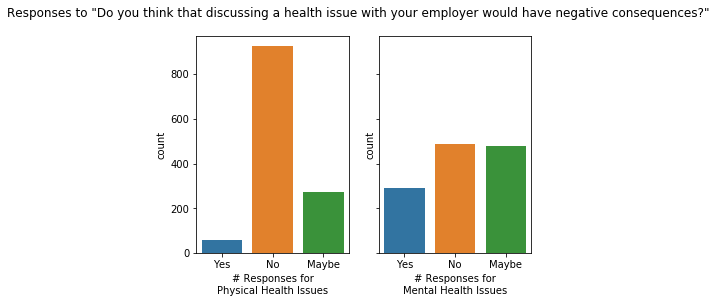

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

g1=sns.countplot(data = df,x = 'phys_health_consequence', ax=ax1, order=['Yes', 'No', 'Maybe'])
g2=sns.countplot(data = df,x = 'mental_health_consequence', ax=ax2, order=['Yes', 'No', 'Maybe'])
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
fig.suptitle('Responses to "Do you think that discussing a health issue with your employer would have negative consequences?"')
plt.ylabel('count')

#### Work Interfere Distribution

This part addresses on the question: If you have a mental health condition, do you feel that it interferes with your work? The raw data shows that "Often" 144(14.5%), "Sometimes" 66(46.8%), "rarely" 173(17.4%), "Never" 213(21.4%).
Therefore, the majority of the survey participants feel mental health will interfere thier career. This is likely the reason why many people believe discussing a mental health issue with thier employers would have negative consequences since they are worried it would affect their work and further harm thier careers. 

Text(0,0.5,'Count')

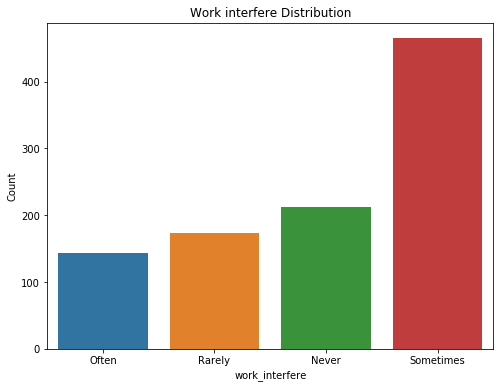

In [9]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

## Part2 Improving a journal article

Human computation, specifically crowdsourcing approaches, could help to overcome the inherent variance of odor perception by collecting the opinions of many independent smellers. In the article Detection and Classification of Human Body Odor Using an Electronic Nose (Wongchoosuk et al., 2009), human body odors were collected only from two male volunteers, which is a small odor sample. However, introducing a new measurement or promoting a new technology like E-nose require researchers to conduct multiple experiments by using different materials from different data bases. Therefore, in order to extend the discrimination of human body odors like gender factor ignored in this article, I plan to reformulate the part of data collection in a human computational way by increasing sensor types that response to a variety of volatile molecules. 

The whole crowd-sourced workflow starts from collecting public participants’ sweat. Untrained public participants will attend public events, say a science or an art museum on specific days. Sweat samples are collected with cotton pads worn under the clothing and against axillary vault. When subjects are viewing exhibitions or doing any light physical activities, the gauze pads in each armpit will contain the sweat. After sweat collection, left and right armpits will be combined as a single sample to this individual and will be stored in odorless glass at -80 °C. 

After getting sweat samples, I will distribute those smell samples to smellers, whose reflections and opinions will be recorded on a web-based data platform in order to code different odors. Smellers  are recruited from the same population of donors at the same public event. Participants will be randomly assigned five odors to evaluate their emotional states (liking, joy, anger, sadness, and fear), intensities (0%-100%), and class descriptors (animal, chemical, spicy, fruity, fatty, and vegetal). All those evaluations will be presented on a web-browser and stored on a data collection platform. 

As a reward, odor donors will have a chance to learn about the composition of their own body odor. Salganik (2017) mentioned that the way to motivate participants is to design experiments like fun and competition. In my research, participants not only acquire a learning opportunity on sweat collection, but also will be given an access to their own body odor evaluations. During the odor collection, each donor will be assigned a unique numerical code, keeping confidential and providing double-blind odor evaluations. 

The primary advantage of human computation method is that it enables researchers to handle infinte amounts of data using a finite amount of human effort (Salganik, 2017). In my reformulated study, I will aggregate crowd-sourced of body odor and build a "sweat odorbase" on a web-based platform which is available for reproducing results from conventional laboratory-based studies and extending to future research. 

Sweat odor is not easily to be produced by computers, which means that I have to break this big problem into lots of simple micro-tasks that can be solved by people. Since body odor perception is a high variance and highly personal phenomenon that cannot be well resolved from a small data set, heterogeneity will be leveraged, including different ages, genders, and social backgrounds. In this way, even if the chemical complexity of sweat and subjectivity of smeller perception may combine to show high variance, the central tendency of human-derived estimates can be highly informative. 




Reference:
Salganik, Matthew J. 2017. Bit by Bit: Social Research in the Digital Age. Princeton, NJ: Princeton.
Wongchoosuk, C., Lutz, M., & Kerdcharoen, T. (2009). Detection and classification of human body odor using an electronic nose. Sensors, 9(9), 7234-7249.

## Part3 Alternative 

I spent one hour on Clickworker which is similar to Amazon MTurk and took three surveys. Interestingly, every time I opened a new task, I had to finish several pre-test questions to examine if I am qualified to take the survey. Therefore, there are serveral transactions uncredied because of unmatch. Unfortunately, I failed to find out a page to record my one-hour process, so I attach the screenshot of survey time and matched bonus points.  